# Customer Segmentation using online retail dataset

[Dataset](https://www.kaggle.com/datasets/vijayuv/onlineretail?datasetId=3466&sortBy=voteCount)

##1 Introduction

### 1.1 Dataset Overview

This dataset contains all purchases made for an online retail company based in the UK during an eight month period.

### 1.2 Goal

The project analyzes the Kaggle Online Retail dataset, examining customer transactions. It aims to gain insights into customer behavior, preferences, and purchasing patterns. Customer segmentation is performed to identify target groups, tailor marketing strategies, and improve business performance. Data analysis techniques are utilized to provide valuable insights and actionable recommendations for the online retail store.

### 1.3 Install and load libraries

Installed and imported library packages needed



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno


###1.4 Load the data

In [ ]:
import urllib.request
import zipfile
import pandas as pd

# Download the dataset zip file
url = 'https://archive.ics.uci.edu/static/public/352/online+retail.zip'
file_name = 'online+retail.zip'
urllib.request.urlretrieve(url, file_name)

# Unzip the file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Read the Excel file
excel_file = 'Online Retail.xlsx'
df = pd.read_excel(excel_file)

# Add the variable 'TotalPrice' calculated as the product of 'UnitPrice' and 'Quantity'
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']


# Display the first few rows of the DataFrame
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


## 2 Exploratory data analysis


### 2.1 Data Overview

The data consists of 9 variables, including 6 categorical and 3 numerical variables, with a total of 541,909 observations. Below is a brief sketch of the data.


In [ ]:
df.shape

(541909, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


>+ **InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
>+ **StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
>+ **Description**: Product (item) name. *Nominal*.
>+ **Quantity**: The quantities of each product (item) per transaction. *Numeric*.
>+ **InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
>+ **UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
>+ **CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
>+ **Country**: Country name. *Nominal*, the name of the country where each customer resides.
>+ **TotalPrice**: Represents the calculated value obtained by multiplying 'UnitPrice' and 'Quantity' for each transaction, *Numeric*.

In [ ]:
df.iloc[:,0:9].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 2.2 Handling missing values

In dealing with Null values, 2 columns(Description, Cutomer ID)in the data frame had Null values.

In [ ]:
# Total null value counts.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

<Axes: >

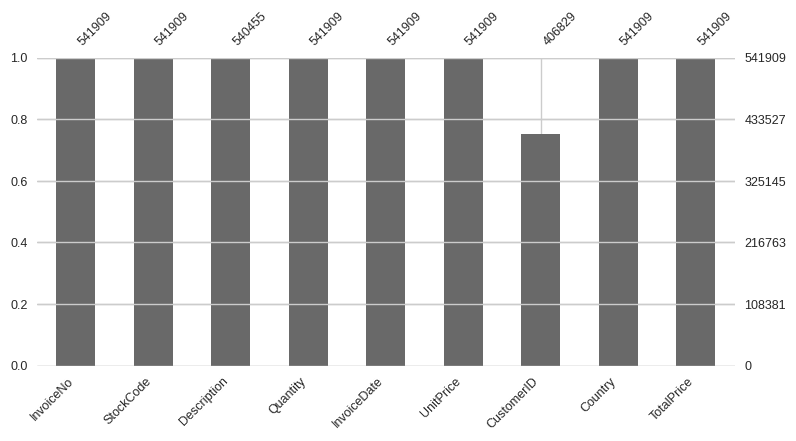

In [ ]:
# Non null value proportion 9*4
msno.bar(df, figsize=(9, 4), fontsize=9)

> + Among the variables in the dataset, only two have missing values: `CustomerID` and `Description`.
> + The `CustomerID` variable contains the highest number of null values, with approximately 150,000 rows affected.
> + On the other hand, the `Description` variable has around 1,500 rows with missing values.

<Axes: >

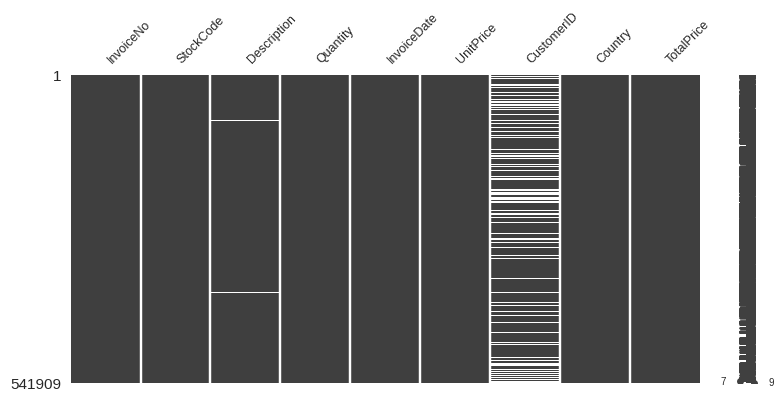

In [ ]:
# Location of Null values
msno.matrix(df, figsize=(9,4), fontsize=9)

> + Since there is no specific pattern in the occurrence of missing values, we do not need to worry about any associations among them.

<Axes: >

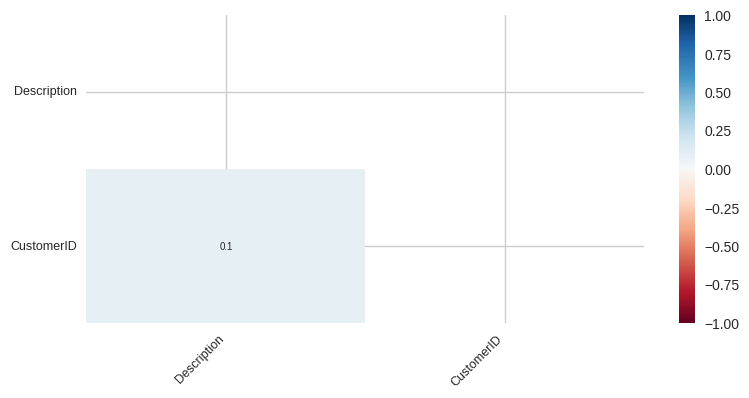

In [ ]:
# Correlation of Null values
msno.heatmap(df, figsize=(9,4), fontsize=9)

> +  Since there is a weak correlation between **`Description`** and **`CustomerID`**, it validates the previous result that there is no specific pattern in the missing values.

In [ ]:
# Remove the 'Description' column from the DataFrame as it cannot be utilized for analysis
df_cleaned = df.drop(columns=['Description'])

# Remove rows with null values in the "CustomerID" column from the updated DataFrame
df_cleaned.dropna(subset=['CustomerID'], inplace=True)

> + To ensure accuracy and reliability, we remove outliers and variables with missing values that cannot be utilized for calculations from the dataset.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
 7   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.9+ MB


### 2.3 Visualization & Preprocessing
- To grasp the data structure, appropriate plots like line plots, scatter plots, or bar plots were employed, considering the variable type. Outliers were removed, and columns with missing values were discarded during visualization. While not all visualizations are shown here, all variables underwent evaluation throughout the project.


- Based on the visualized data analysis, preprocess the data in the form that can be used in model building.

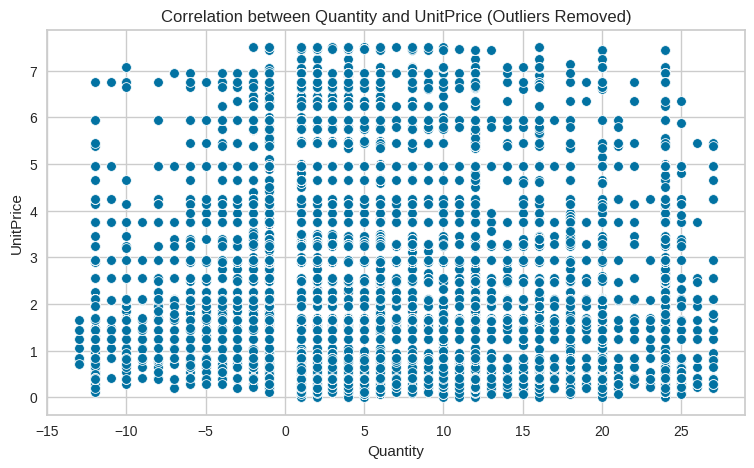

In [ ]:
import seaborn as sns

# Using the IQR method to identify outliers for 'Quantity' and 'UnitPrice' columns
Q1_quantity = df_cleaned['Quantity'].quantile(0.25)
Q3_quantity = df_cleaned['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df_cleaned['UnitPrice'].quantile(0.25)
Q3_unitprice = df_cleaned['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define the boundaries to detect outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Remove the rows with outliers from the DataFrame 'df_cleaned'
df_cleaned = df_cleaned[
    (df_cleaned['Quantity'] >= lower_bound_quantity) & (df_cleaned['Quantity'] <= upper_bound_quantity) &
    (df_cleaned['UnitPrice'] >= lower_bound_unitprice) & (df_cleaned['UnitPrice'] <= upper_bound_unitprice)
]

# Plot the scatterplot with outliers removed
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_cleaned, x='Quantity', y='UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Correlation between Quantity and UnitPrice (Outliers Removed)')
plt.show()


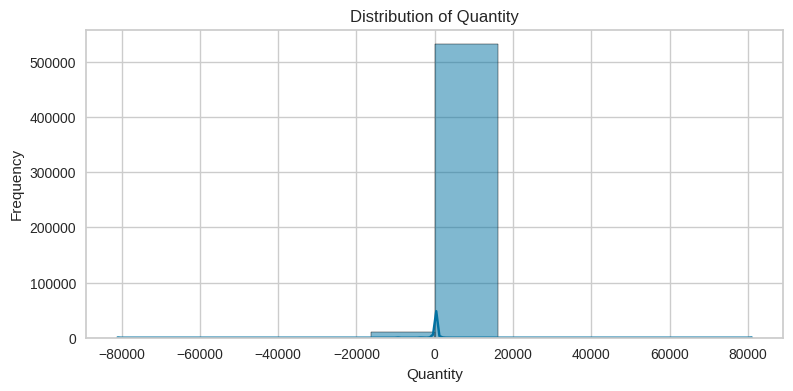

In [ ]:
# Distribution of Quantity (HISTOGRAM)
plt.figure(figsize = (9, 4))
sns.histplot(data = df, x = "Quantity", bins = 10, kde = True)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity")
plt.show()

> + After reviewing the histogram, it became apparent that the data range extended beyond -20000 to 20000. To improve analysis accuracy, the data range was adjusted by removing outliers. This step helps focus on relevant data and reduces the influence of extreme values, resulting in more reliable analysis outcomes.

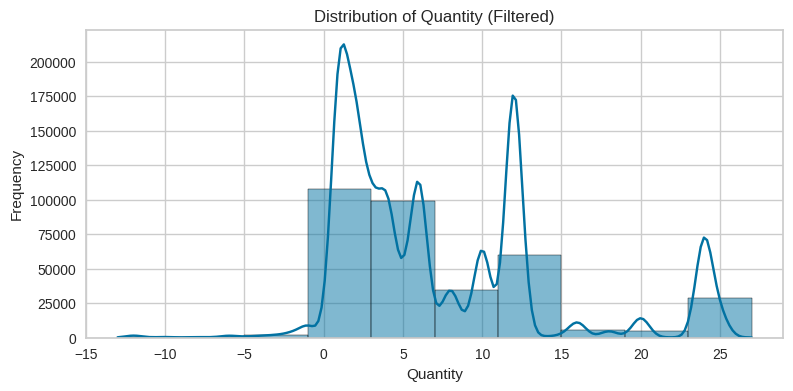

In [ ]:
# Filter data within the specified range
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= -20000) & (df_cleaned['Quantity'] <= 20000)]

# Plot the histogram with filtered data
plt.figure(figsize=(9, 4))
sns.histplot(data=df_cleaned, x="Quantity", bins=10, kde=True)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity (Filtered)")
plt.show()

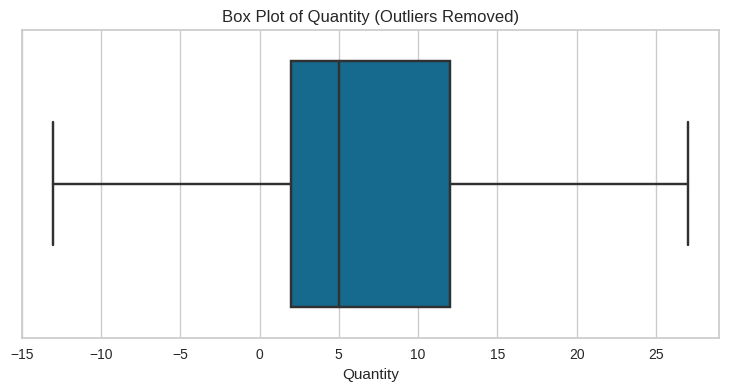

In [ ]:
# Distribution of Quantity (BOX PLOT)

# Using the IQR method to identify outliers for the 'Quantity' column in the filtered DataFrame
Q1_quantity = df_cleaned['Quantity'].quantile(0.25)
Q3_quantity = df_cleaned['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Define the boundaries to detect outliers in the filtered DataFrame
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Remove the rows with outliers from the filtered DataFrame
df_cleaned = df_cleaned[
    (df_cleaned['Quantity'] >= lower_bound_quantity) & (df_cleaned['Quantity'] <= upper_bound_quantity)
]

# Plot the box plot without outliers
plt.figure(figsize=(9, 4))
sns.boxplot(data=df_cleaned, x="Quantity")
plt.xlabel("Quantity")
plt.title("Box Plot of Quantity (Outliers Removed)")
plt.show()

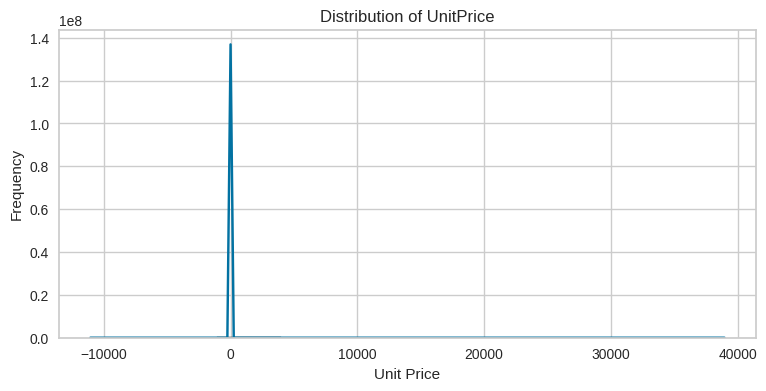

In [ ]:
# Distribution of UnitPrice
plt.figure(figsize = (9, 4))
sns.histplot(data = df, x = "UnitPrice", bins = 10, kde = True)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of UnitPrice")
plt.show()

> + Similarly to the Quantity histogram, adjustments to the data range were necessary for a more accurate analysis of the UnitPrice distribution.

In [ ]:
# Calculate the mean and standard deviation of 'UnitPrice'
unitprice_mean = df['UnitPrice'].mean()
unitprice_std = df['UnitPrice'].std()

# Display the mean and standard deviation
print("Mean of UnitPrice:", unitprice_mean)
print("Standard Deviation of UnitPrice:", unitprice_std)

Mean of UnitPrice: 4.611113626088513
Standard Deviation of UnitPrice: 96.75985306117938


In [ ]:
# Calculate the IQR for 'UnitPrice'
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define the boundaries for outliers
lower_bound = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound = Q3_unitprice + 1.5 * IQR_unitprice

# Identify outliers in 'UnitPrice'
outliers = df[(df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound)]

# Display the outliers
print(outliers['UnitPrice'])

16         9.95
45        18.00
65        10.95
141       27.50
151       14.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 39627, dtype: float64


> + To determine where the appropriate range is, I utilized the mean and standard deviation, which helped me in identifying the outliers. This process allowed me to determine the range of values that could be considered typical and relevant for the analysis.

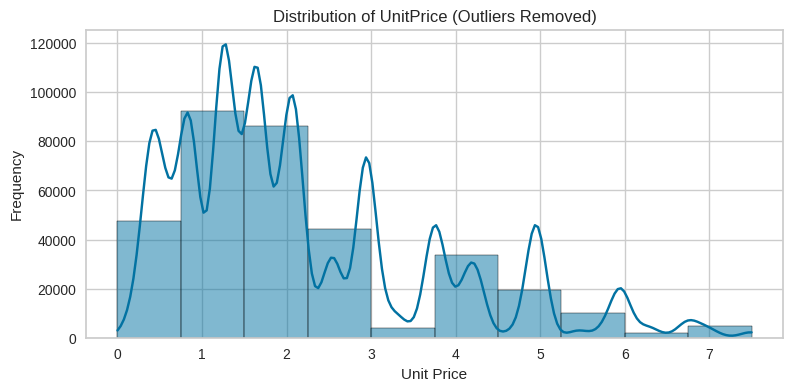

In [ ]:
# Remove data points outside the range of -100 to 100 for 'UnitPrice' in the existing df_cleaned DataFrame
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] >= -100) & (df_cleaned['UnitPrice'] <= 100)]

# Plot the modified histogram
plt.figure(figsize=(9, 4))
sns.histplot(data=df_cleaned, x='UnitPrice', bins=10, kde=True)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice (Outliers Removed)')
plt.show()

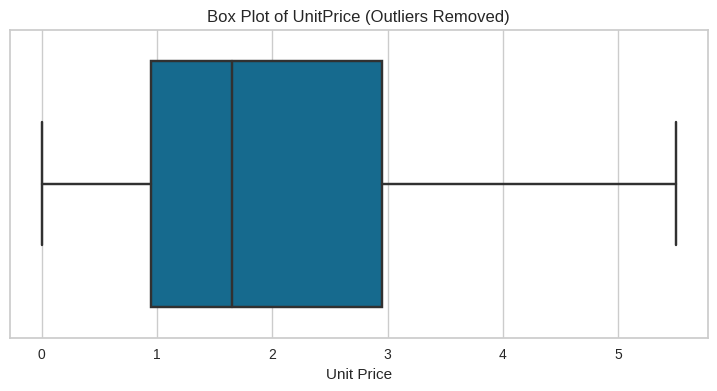

In [ ]:
# Using the IQR method to identify outliers for the 'UnitPrice' column
Q1_unitprice = df_cleaned['UnitPrice'].quantile(0.25)
Q3_unitprice = df_cleaned['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define the boundaries to detect outliers
lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Remove the rows with outliers from the DataFrame 'df_cleaned'
df_cleaned = df_cleaned[
    (df_cleaned['UnitPrice'] >= lower_bound_unitprice) & (df_cleaned['UnitPrice'] <= upper_bound_unitprice)
]

# Plot the box plot without outliers
plt.figure(figsize=(9, 4))
sns.boxplot(data=df_cleaned, x="UnitPrice")
plt.xlabel("Unit Price")
plt.title("Box Plot of UnitPrice (Outliers Removed)")
plt.show()

In [ ]:
# Calculate the total purchase amount for each customer
df_cleaned['TotalPurchase'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Check the total purchase amount for each customer
customer_total_purchase = df_cleaned.groupby('CustomerID')['TotalPurchase'].sum()
print(customer_total_purchase)

CustomerID
12347.0    3243.33
12348.0      90.20
12349.0     918.10
12350.0     294.40
12352.0     866.01
            ...   
18280.0     119.15
18281.0      46.92
18282.0      98.18
18283.0    2040.08
18287.0     960.76
Name: TotalPurchase, Length: 4209, dtype: float64


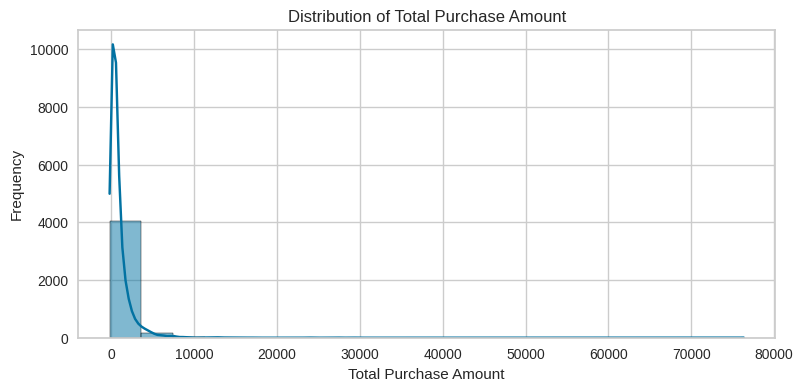

In [ ]:
plt.figure(figsize=(9, 4))
sns.histplot(customer_total_purchase, bins=20, kde=True)
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Purchase Amount")
plt.show()

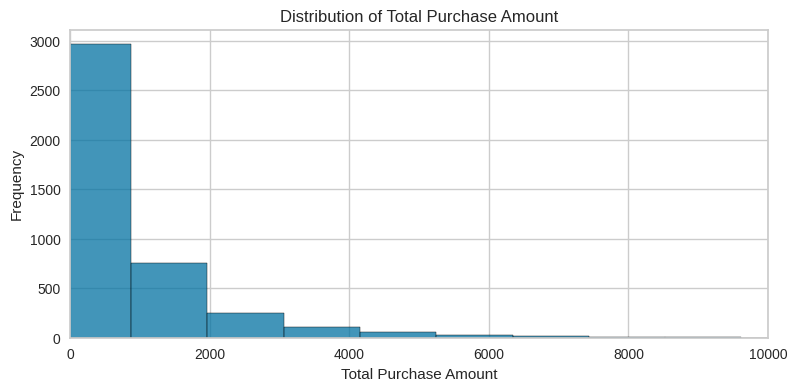

In [ ]:
plt.figure(figsize=(9, 4))
sns.histplot(customer_total_purchase, bins=70, kde=False)
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Purchase Amount")
plt.xlim(0, 10000)  # Set the x-axis range up to 10000
plt.show()

+ > Identifying a right-skewed distribution in the total purchase amount histogram is vital for our customer segmentation analysis, revealing distinct spending behaviors across segments and underscoring the importance of addressing skewness for accurate segmentation outcomes.

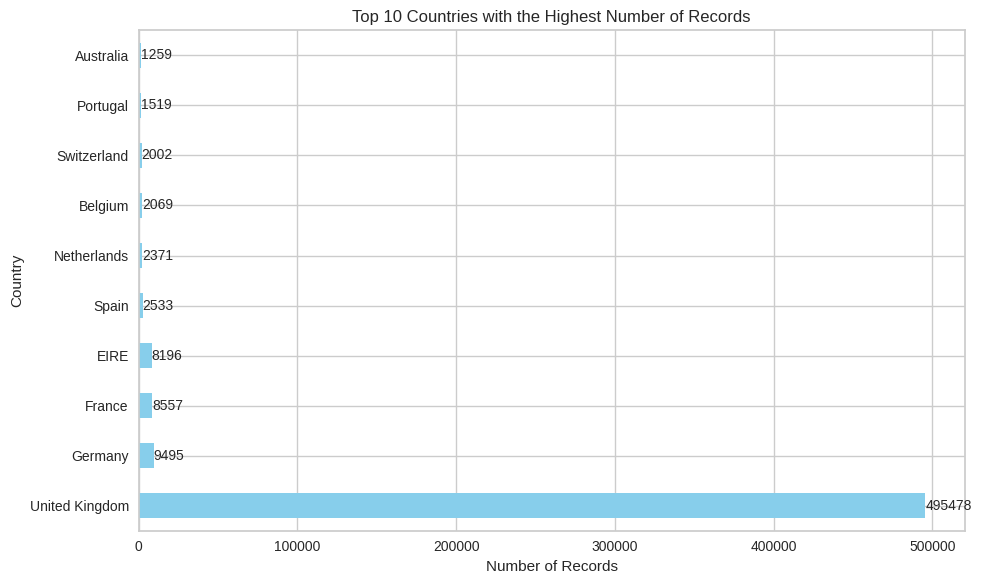

In [ ]:
# Group the data by 'Country' and count the number of records in each group
country_counts = df['Country'].value_counts()

# Get the top 10 countries with the highest number of records
top_10_countries = country_counts.head(10)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='barh', color='skyblue')  # Use horizontal bar plot
plt.xlabel('Number of Records')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Number of Records')

# Add data labels to the bars
for index, value in enumerate(top_10_countries):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 3 Modeling

### 3.1 Creating features for RFM Model


In [ ]:
# Changing data type to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

print("Max date:", df_cleaned["InvoiceDate"].max())
print("Min date:", df_cleaned["InvoiceDate"].min())

Max date: 2011-12-09 12:50:00
Min date: 2010-12-01 08:26:00


In [ ]:
# RFM Featuring
# Set Latest date 2011-12-10 as the last invoice date was 2011-12-09.
Latest_Date = pd.Timestamp(2011, 12, 10)

# Convert InvoiceDate to pandas Timestamp
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Creating RFM features with a subset of customerID
RFM = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
    'InvoiceNo': lambda x: x.nunique(),
    'TotalPrice': lambda x: x.sum()
})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

# Renaming column names to Recency, Frequency, and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

# Reset index and display the first few rows
RFM.reset_index().head().style.set_properties(**{"background-color": "white", "color": "black", "border-color": "black"})

,CustomerID,Recency,Frequency,Monetary
0,12347.000000,2,7,3243.330000
1,12348.000000,248,3,90.200000
2,12349.000000,18,1,918.100000
3,12350.000000,310,1,294.400000
4,12352.000000,36,8,866.010000


> + To enhance the RFM model for customer segmentation, I have added a variable, Interpurchase Time, to capture the average time gap between a customer's shopping transactions, further refining the understanding of customer behavior and enabling targeted engagement strategies.



>*   T = L/(F-1) = (Tn-T1)/(F-1)
*   T --> Interpurchase Time
*   L --> Shopping Cycle
*   F --> Frequency
*   T1 --> First purchase
*   Tn --> Last purchase

   *Note: I have considered only those customers who made purchase more than once.*

In [ ]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties(**{"background-color": "white","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary
CustomerID,,,
12347.000000,2,7,3243.330000
12348.000000,248,3,90.200000
12352.000000,36,8,866.010000
12356.000000,245,2,919.760000
12358.000000,1,2,92.820000


In [ ]:
# To compute the shopping cycle for each customer based on the time difference, in days, between their earliest and latest purchase dates
Shopping_Cycle = df_cleaned.groupby('CustomerID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties(**{"background-color": "white","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Shopping_Cycle
CustomerID,,,,
12347.000000,2,7,3243.330000,365
12348.000000,248,3,90.200000,109
12352.000000,36,8,866.010000,260
12356.000000,245,2,919.760000,80
12358.000000,1,2,92.820000,149


In [ ]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties(**{"background-color": "white","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time
CustomerID,,,,
12347.000000,2,7,3243.330000,52
12348.000000,248,3,90.200000,36
12352.000000,36,8,866.010000,32
12356.000000,245,2,919.760000,40
12358.000000,1,2,92.820000,74


### 3.2 Modelling with KMeans Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

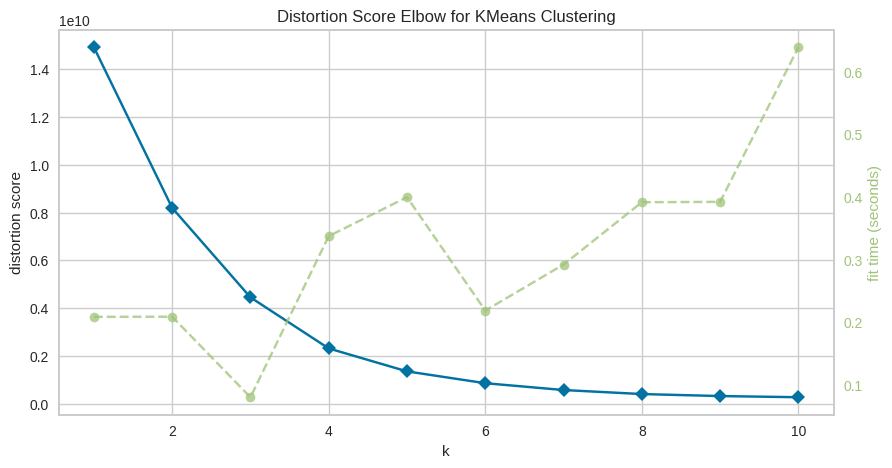

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans_model = KMeans()

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.set_facecolor("white")

Elbow_M = KElbowVisualizer(kmeans_model, k=(1, 11), metric='distortion', timings=True, locate_elbow=False)  # k값 제외 옵션 설정
Elbow_M.fit(RFMT)
Elbow_M.show()

> + In order to determine the optimal value of K, an analysis of the Elbow Method results graph was conducted. [**k = 6**]

In [ ]:
#Fitting KMeans Model

k = 6

kmeans = KMeans(n_clusters=k,max_iter=50)
kmeans.fit(RFMT)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=6)

In [ ]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties(**{"background-color": "white","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
CustomerID,,,,,
12347.000000,2,7,3243.330000,52,2
12348.000000,248,3,90.200000,36,0
12352.000000,36,8,866.010000,32,0
12356.000000,245,2,919.760000,40,0
12358.000000,1,2,92.820000,74,0


### 3.2 Model Evaluation

Cluster Means:
            Recency   Frequency      Monetary  Interpurchase_Time
Clusters                                                         
0         76.307054    3.565871    512.187485           46.704357
1          3.400000  102.600000  26398.804000            3.800000
2         15.292683   17.019512   4163.104537           23.604878
3          1.000000  227.000000  76323.570000            1.000000
4          5.368421   32.500000   8941.995789           14.578947
5         36.035928    8.092814   1837.990765           36.143713


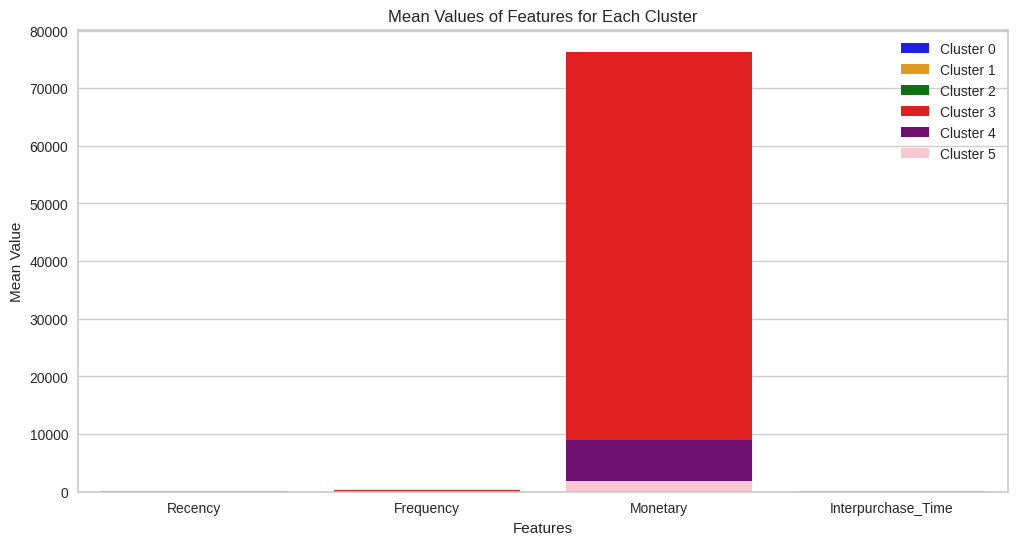


Cluster 0
Size: 1928
Recency Mean: 76.30705394190872
Frequency Mean: 3.565871369294606
Monetary Mean: 512.1874854771785
Interpurchase Time Mean: 46.704356846473026

Cluster 1
Size: 5
Recency Mean: 3.4
Frequency Mean: 102.6
Monetary Mean: 26398.804000000004
Interpurchase Time Mean: 3.8

Cluster 2
Size: 205
Recency Mean: 15.292682926829269
Frequency Mean: 17.01951219512195
Monetary Mean: 4163.104536585366
Interpurchase Time Mean: 23.60487804878049

Cluster 3
Size: 1
Recency Mean: 1.0
Frequency Mean: 227.0
Monetary Mean: 76323.57
Interpurchase Time Mean: 1.0

Cluster 4
Size: 38
Recency Mean: 5.368421052631579
Frequency Mean: 32.5
Monetary Mean: 8941.995789473685
Interpurchase Time Mean: 14.578947368421053

Cluster 5
Size: 668
Recency Mean: 36.035928143712574
Frequency Mean: 8.092814371257486
Monetary Mean: 1837.99076497006
Interpurchase Time Mean: 36.1437125748503


In [ ]:
# Analyzing Clustering Results

# Calculate the mean of each feature for each cluster
cluster_means = RFMT.groupby('Clusters').mean()

# Display the mean values for each cluster
print("Cluster Means:")
print(cluster_means)

# Visualize the distribution of features for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Define cluster colors
cluster_colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink']

# Loop through each cluster
for cluster in range(6):
    sns.barplot(x=cluster_means.columns, y=cluster_means.iloc[cluster], color=cluster_colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features for Each Cluster')
plt.legend()
plt.show()

# Compare cluster characteristics
for cluster in range(6):
    print("\nCluster", cluster)
    print("Size:", len(RFMT[RFMT['Clusters'] == cluster]))
    print("Recency Mean:", cluster_means.loc[cluster, 'Recency'])
    print("Frequency Mean:", cluster_means.loc[cluster, 'Frequency'])
    print("Monetary Mean:", cluster_means.loc[cluster, 'Monetary'])
    print("Interpurchase Time Mean:", cluster_means.loc[cluster, 'Interpurchase_Time'])

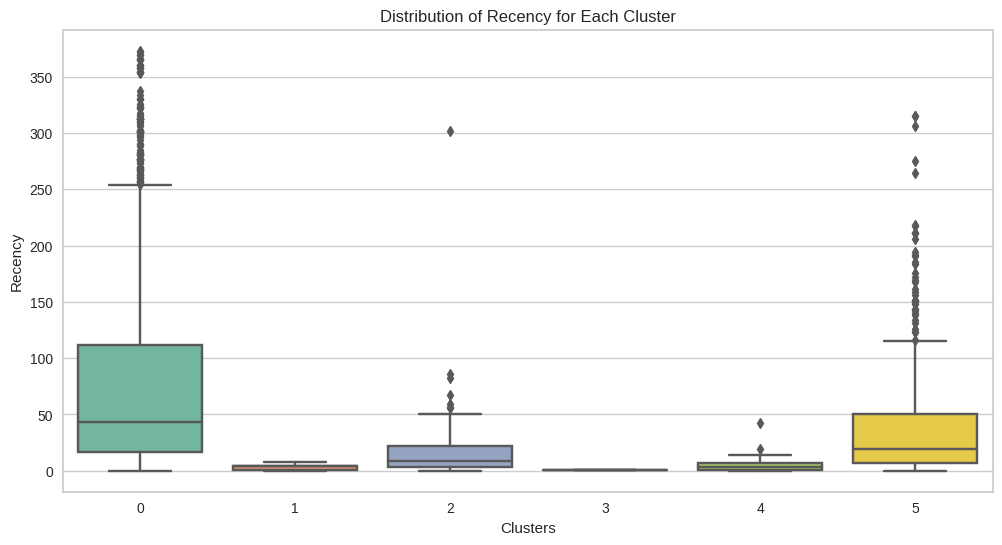

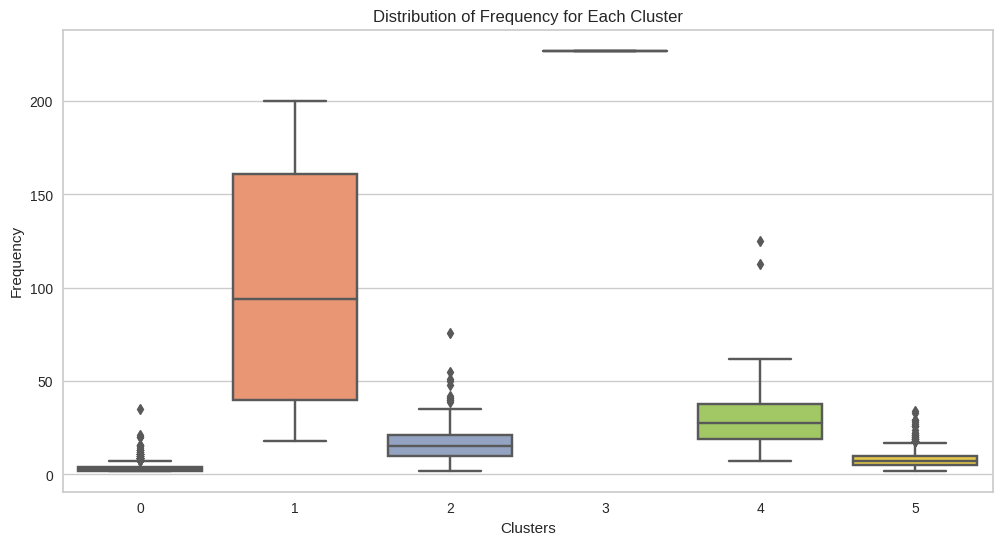

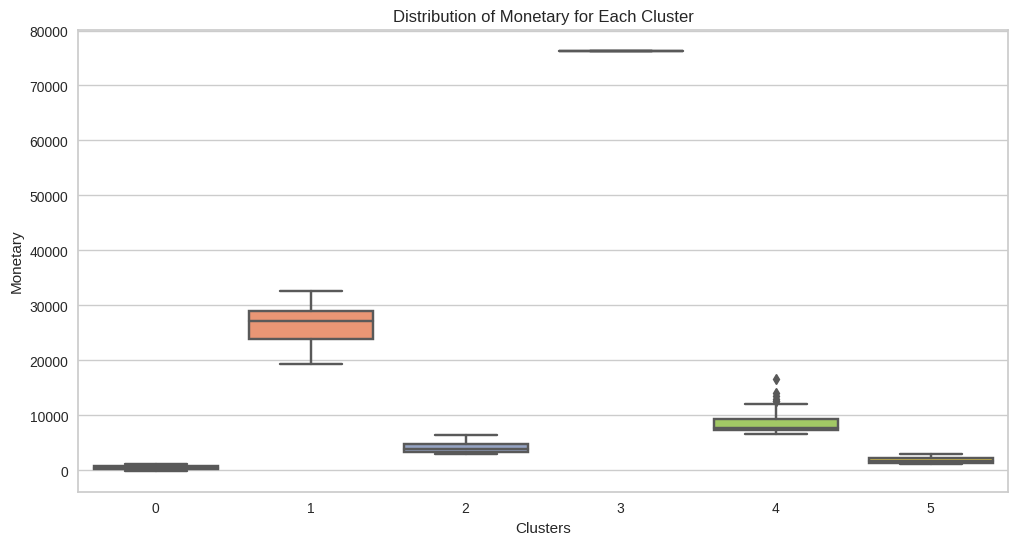

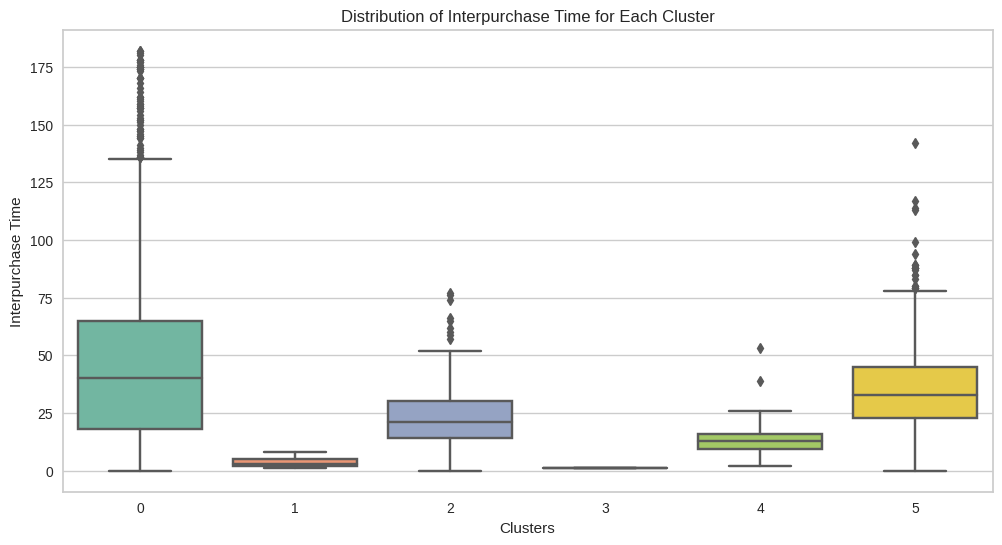

In [ ]:
# Recency distribution visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=RFMT, x='Clusters', y='Recency', palette='Set2')
plt.xlabel('Clusters')
plt.ylabel('Recency')
plt.title('Distribution of Recency for Each Cluster')
plt.show()

# Frequency distribution visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=RFMT, x='Clusters', y='Frequency', palette='Set2')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency for Each Cluster')
plt.show()

# Monetary distribution visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=RFMT, x='Clusters', y='Monetary', palette='Set2')
plt.xlabel('Clusters')
plt.ylabel('Monetary')
plt.title('Distribution of Monetary for Each Cluster')
plt.show()

# Intepurchase Time distribution visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=RFMT, x='Clusters', y='Interpurchase_Time', palette='Set2')
plt.xlabel('Clusters')
plt.ylabel('Interpurchase Time')
plt.title('Distribution of Interpurchase Time for Each Cluster')
plt.show()

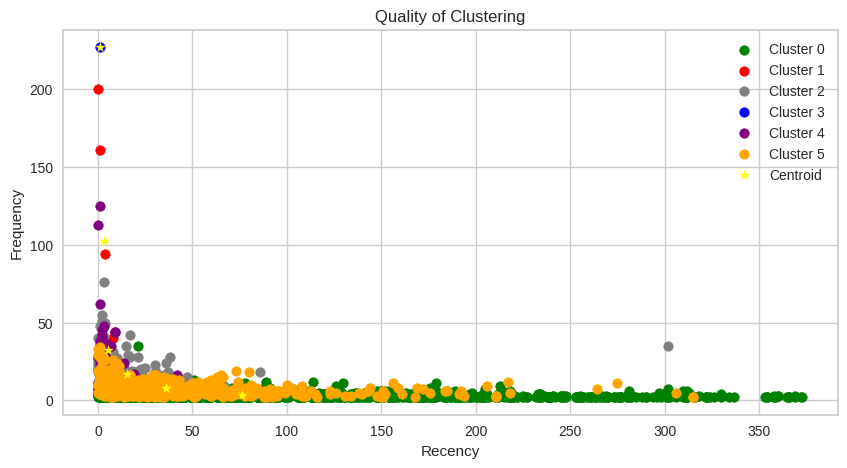

In [ ]:
# Grouping the data in accordance with each cluster separately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]
five = RFMT[RFMT["Clusters"]==4]
six = RFMT[RFMT["Clusters"]==5]


# Checking the quality of clustering in the dataset
plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(one["Recency"], one["Frequency"], color='green', label='Cluster 0')
plt.scatter(two["Recency"], two["Frequency"], color='red', label='Cluster 1')
plt.scatter(three["Recency"], three["Frequency"], color='grey', label='Cluster 2')
plt.scatter(four["Recency"], four["Frequency"], color='blue', label='Cluster 3')
plt.scatter(five["Recency"], five["Frequency"], color='purple', label='Cluster 4')
plt.scatter(six["Recency"], six["Frequency"], color='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow", marker="*", label="Centroid")
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Quality of Clustering')
plt.legend()
plt.show()

## 4 Result
In addition, the obtained silhouette score of 0.6279 underscores the KMeans algorithm's proficiency in detecting cohesive clusters within our dataset, enhancing the credibility and depth of our segmentation analysis.

Silhouette score : 0.6279234122686771


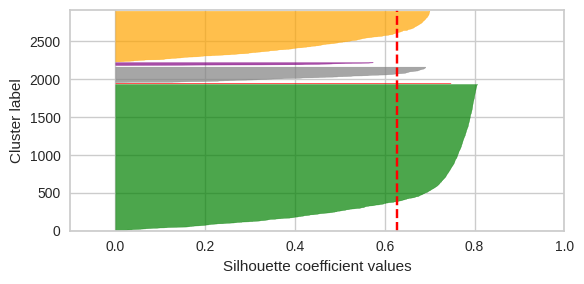

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for each sample
silhouette_values = silhouette_samples(RFMT, kmeans.labels_)

# Plotting silhouette scores
plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(RFMT) + (len(clusters) + 1) * 10])

y_lower = 10
for i in range(len(clusters)):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

plt.tight_layout()
plt.show()